In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('framingham.csv')

In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [9]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [11]:
df['education']=df['education'].fillna(1.0)

In [13]:
df['education'].isnull().sum()

0

In [14]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
df['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
16.0       3
12.0       3
13.0       3
45.0       3
19.0       2
14.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64

In [16]:
df['cigsPerDay']=df['cigsPerDay'].fillna(0.0)

In [17]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [18]:
df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [19]:
df['BPMeds']=df['BPMeds'].fillna(0.0)

In [20]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
df['totChol'].mean()

236.72158548233045

In [24]:
df['totChol']=df['totChol'].fillna(236.72)

In [27]:
df['BMI'].mean()

25.80200758473571

In [28]:
df['BMI']=df['BMI'].fillna(25.80)

In [30]:
df['glucose'].mean()

81.96675324675324

In [31]:
df['glucose']=df['glucose'].fillna(81.96)

In [32]:
df['heartRate'].mean()

75.87892376681614

In [33]:
df['heartRate']=df['heartRate'].fillna(75.87)

In [34]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [35]:
df.rename(columns={'male':'Gender'},inplace=True)

In [37]:
df.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [38]:
df['Gender']=df['Gender'].replace({0:'Female',1:'Male'})
df['currentSmoker']=df['currentSmoker'].replace({0:'No',1:'Yes'})
df['BPMeds']=df['BPMeds'].replace({0:'No',1:'Yes'})
df['prevalentHyp']=df['prevalentHyp'].replace({0:'No',1:'Yes'})
df['prevalentStroke']=df['prevalentStroke'].replace({0:'No',1:'Yes'})
df['diabetes']=df['diabetes'].replace({0:'No',1:'Yes'})
df['TenYearCHD']=df['TenYearCHD'].replace({0:'No',1:'Yes'})

In [40]:
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Female,43,2.0,No,0.0,No,No,Yes,No,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Female,63,1.0,No,0.0,No,No,No,No,205.0,138.0,71.0,33.11,60.0,85.0,Yes
7,Female,45,2.0,Yes,20.0,No,No,No,No,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Male,52,1.0,No,0.0,No,No,Yes,No,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Male,43,1.0,Yes,30.0,No,No,Yes,No,225.0,162.0,107.0,23.61,93.0,88.0,No


<AxesSubplot:xlabel='Gender', ylabel='count'>

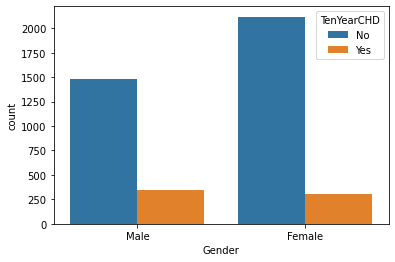

In [41]:
sns.countplot(x='Gender',hue='TenYearCHD',data=df)

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

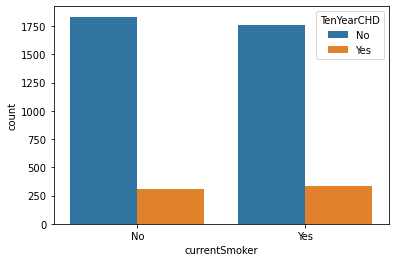

In [42]:
sns.countplot(x='currentSmoker',hue='TenYearCHD',data=df)

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

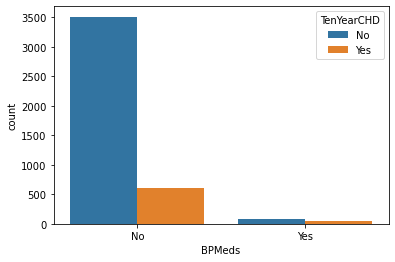

In [43]:
sns.countplot(x='BPMeds',hue='TenYearCHD',data=df)

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

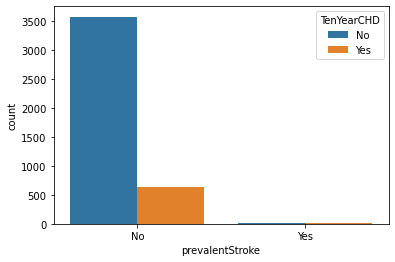

In [44]:
sns.countplot(x='prevalentStroke',hue='TenYearCHD',data=df)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

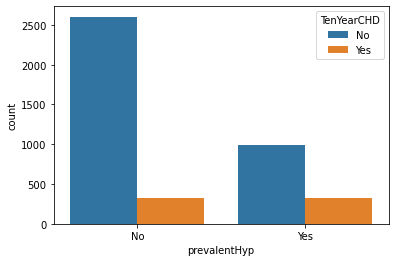

In [45]:
sns.countplot(x='prevalentHyp',hue='TenYearCHD',data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

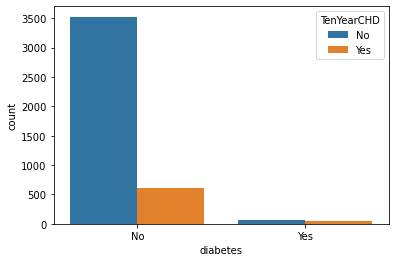

In [46]:
sns.countplot(x='diabetes',hue='TenYearCHD',data=df)

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
df.head(4)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes


In [59]:
df.Gender=le.fit_transform(df.Gender)
df.currentSmoker=le.fit_transform(df.currentSmoker)
df.BPMeds=le.fit_transform(df.BPMeds)
df.prevalentHyp=le.fit_transform(df.prevalentHyp)
df.prevalentStroke=le.fit_transform(df.prevalentStroke)
df.diabetes=le.fit_transform(df.diabetes)

In [61]:
df.head(5)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [62]:
x=df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [63]:
x

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.00
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.00
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.00
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.00
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.00
4234,1,51,3.0,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.00
4235,0,48,2.0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.00
4236,0,44,1.0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.96


In [64]:
y

0        No
1        No
2        No
3       Yes
4        No
       ... 
4233    Yes
4234     No
4235     No
4236     No
4237     No
Name: TenYearCHD, Length: 4238, dtype: object

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(1060, 15)
(3178, 15)
(1060,)
(3178,)


In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)

In [68]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [69]:
logreg.score(x_train,y_train)

0.8527375707992448

In [70]:
y_pred = logreg.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [72]:
print(confusion_matrix(y_test,y_pred))

[[901   7]
 [135  17]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       908
         Yes       0.71      0.11      0.19       152

    accuracy                           0.87      1060
   macro avg       0.79      0.55      0.56      1060
weighted avg       0.85      0.87      0.82      1060



In [74]:
print(accuracy_score(y_test,y_pred)*100)

86.60377358490567


In [75]:
comparsion = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [76]:
comparsion.head(20)

,Actual,Predicted
3188,No,No
764,No,No
3264,No,No
1967,No,No
2185,No,No
393,No,No
2333,Yes,No
1159,No,No
3788,No,No
1674,Yes,Yes
